In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
exp_type = 'simulation'
exp = 'cycle1'
exp_name = '2024_02_26-16_04'

**Prepare structures and functions to plot everything we need**

In [3]:
folder_exp_dict = {'cycle1': 'aging_1', 'cycle2': 'aging_2'}

In [4]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'
aging_file = folder_path / folder_exp_dict[exp] / exp_name / 'aging.csv'

In [27]:
def plot_compared_data(dfs, 
                       variables: list, 
                       x_axes: list,
                       labels: list, 
                       x_label: str,
                       y_label: str,
                       markers: list,
                       title: str, 
                       colors=None, 
                       save_fig=False, 
                       fig_name=''
                      ):
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
        
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        plt.scatter(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], s=0.1, rasterized=True)
        #plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i])
    
    plt.ticklabel_format(style='plain')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.legend()
    
    if save_fig:
        plt.savefig(fig_name, format='svg', transparent=True, dpi=200)
    
    plt.show()

In [28]:
def plot_aging_data(dfs, 
                    variables: list, 
                    x_axes: list,
                    labels: list, 
                    x_label: str,
                    y_label: str,
                    markers: list,
                    title: str, 
                    colors=None, 
                    save_fig=False, 
                    fig_name=''
                   ):
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
        
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], s=0.1, rasterized=True)
    
    plt.ticklabel_format(style='plain')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.legend()
    
    if save_fig:
        plt.savefig(fig_name, format='svg', transparent=True, dpi=200)
    
    plt.show()

### RETRIEVE SIMULATION AND GROUND DATA

In [29]:
df_out = pd.read_csv(output_file)
df_out

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
0,-1.0,0.700000,1.000000,3.800000,0.0000,0.000000,0.000000,0.002066,0.002803,108820.956658,307.150000,0.000000
1,0.0,0.699695,1.000000,3.797556,20.0214,-76.032384,3.839105,0.002066,0.002803,108820.956658,307.151269,0.828208
2,1.0,0.699390,1.000000,3.797107,20.0086,-75.974786,3.838812,0.002066,0.002801,108534.260552,307.152531,0.827177
3,2.0,0.699085,1.000000,3.796632,20.0082,-75.963771,3.838519,0.002066,0.002798,108247.740646,307.153790,0.827197
4,3.0,0.698780,1.000000,3.796156,20.0084,-75.955012,3.838226,0.002066,0.002795,107961.221244,307.155046,0.827290
...,...,...,...,...,...,...,...,...,...,...,...,...
1315393,1314391.0,0.985462,0.987511,4.123139,-0.2279,0.939663,4.122195,0.002040,0.001928,14775.662147,307.380431,0.000225
1315394,1314392.0,0.985465,0.987511,4.123152,-0.2328,0.959870,4.122199,0.002040,0.001928,14775.134138,307.380174,0.000229
1315395,1314393.0,0.985469,0.987511,4.123148,-0.2294,0.945850,4.122203,0.002040,0.001928,14774.597624,307.379916,0.000225
1315396,1314394.0,0.985472,0.987511,4.123146,-0.2274,0.937603,4.122207,0.002040,0.001928,14774.067249,307.379658,0.000223


In [30]:
df_ground = pd.read_csv(ground_file)
df_ground 

,current,voltage,temperature,time
0,-20.0214,3.7857,307.0593,0.0
1,-20.0086,3.7765,307.2040,1.0
2,-20.0082,3.7740,307.1449,2.0
3,-20.0084,3.7718,307.1854,3.0
4,-20.0084,3.7700,307.2210,4.0
...,...,...,...,...
1315392,0.2279,4.1499,312.4204,1314391.0
1315393,0.2328,4.1499,312.4698,1314392.0
1315394,0.2294,4.1499,312.4220,1314393.0
1315395,0.2274,4.1499,312.3349,1314394.0


In [31]:
df_aging = pd.read_csv(aging_file)
df_aging

,iteration,cyclic_aging,calendar_aging,degradation
0,0,0.000000,0.000000e+00,0.000000
1,0,0.000000,-9.337170e-10,0.000000
2,50000,0.000425,4.641723e-05,0.000471
3,100000,0.000850,9.307104e-05,0.000943
4,150000,0.001276,1.397821e-04,0.001415
5,200000,0.001702,1.865669e-04,0.001887
6,250000,0.002129,2.334181e-04,0.002360
7,300000,0.002556,2.803212e-04,0.002833
8,350000,0.002984,3.272785e-04,0.003306
9,400000,0.003413,3.743012e-04,0.003780


### PLOT COMPARED DATA

In [32]:
df_soh = df_out[['time', 'soh']].drop_duplicates('soh')

In [33]:
val_data = {'time': [1314395.8, 2297668.81], 'soh': [0.9732, 0.9420]}
df_val = pd.DataFrame(val_data)

In [34]:
args_cycle1 = {
    'dfs': [df_soh, df_val.iloc[0]], 
    'variables': ['soh', 'soh'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Validation'],
    'x_label': 'Time [s]',
    'y_label': '[%]',
    'markers': ['o', 'x'],
    'title': 'SoH',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

args_cycle_temp = {
    'dfs': [df_out[:100000], df_ground[:100000]], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Validation'],
    'x_label': 'Time [s]',
    'y_label': '[%]',
    'markers': ['o', 'x'],
    'title': 'SoH',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

In [35]:
args = {'cycle1': args_cycle1}

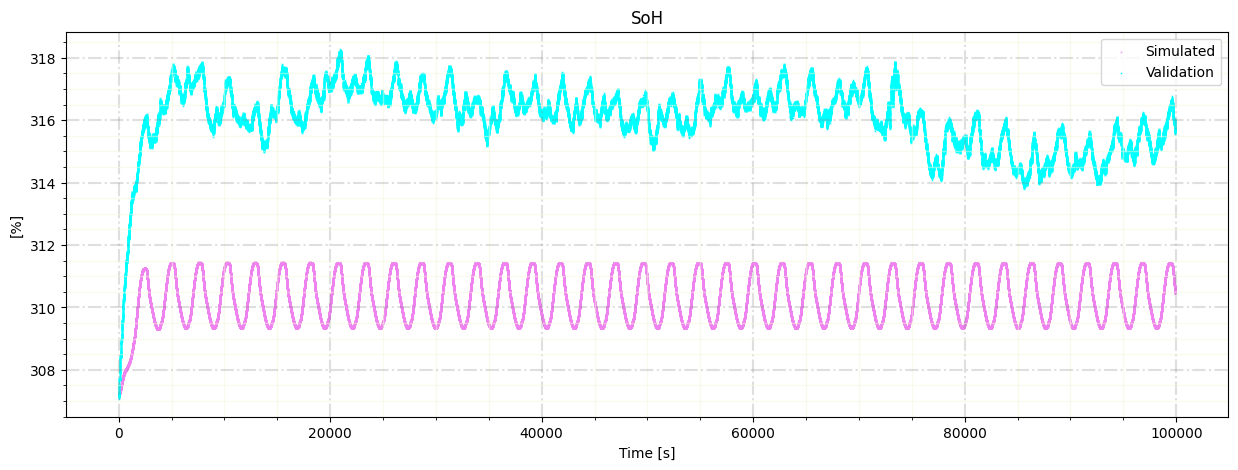

In [36]:
plot_compared_data(**args_cycle_temp)